Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud,STOPWORDS
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("netflix_titles.csv")

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Checking Shape of the data

In [4]:
df.shape

(8807, 12)

No of Columns present in the Dataset

In [5]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Informations about the Dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
# Except  Relaese_year all the Features are categorical variables

In [8]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


Checking if there any null value present in the Dataset or not?

In [9]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Plotting Heatmap for Null Values

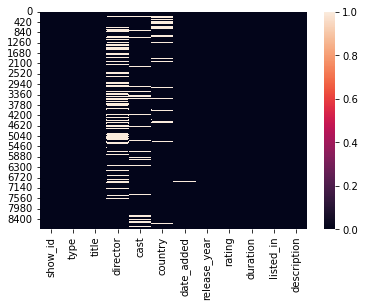

In [10]:
sns.heatmap(df.isnull())

Checking if there any Duplicated Value present in the Dataset or not?

In [11]:
df.duplicated().sum()

0

Checking Unique Values For Features/Count Number of Unique Values

In [12]:
df["type"].unique()

array(['Movie', 'TV Show'], dtype=object)

In [13]:
df["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [14]:
df['release_year'].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943])

In [15]:
df['release_year'].nunique()

74

In [16]:
df['listed_in'].nunique()

514

In [17]:
df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

Checking the no.of Movies vs no.of Shows In the netflix library

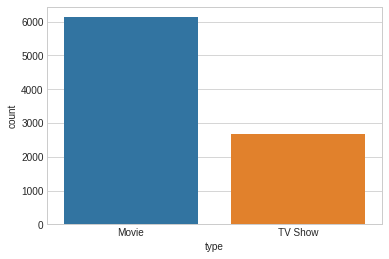

In [18]:
plt.style.use('seaborn-whitegrid')
sns.countplot(df["type"])

Most of the Data used in the dataset for Movie data

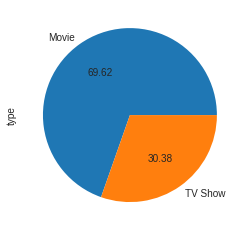

In [19]:
df["type"].value_counts().plot(kind="pie",autopct="%.2f")

Most of the data for Movies: 69.62%

TV_Shows:30.38%

Checking no.of Rating in each category for movies and TV Shows

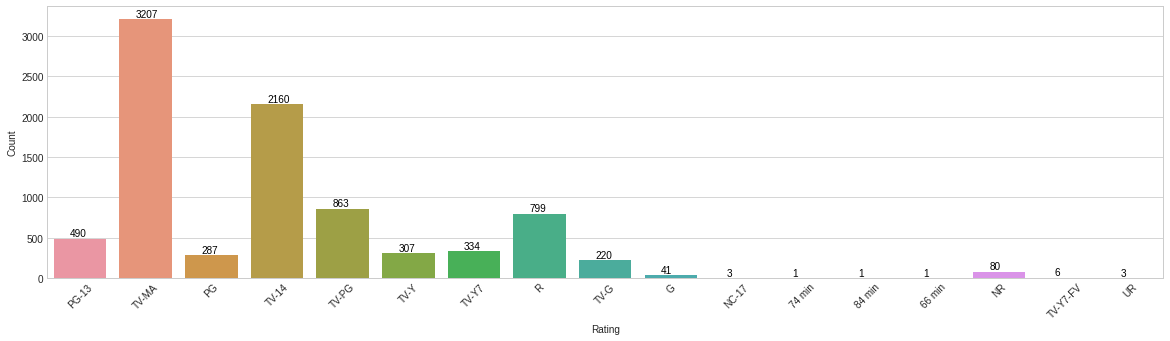

In [20]:
plt.figure(figsize=(20,5))
plt.style.use('seaborn-whitegrid')
ax=sns.countplot(x="rating",data=df)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va = 'bottom', color = 'black')

Check how many Movies/TV/Shows release each year

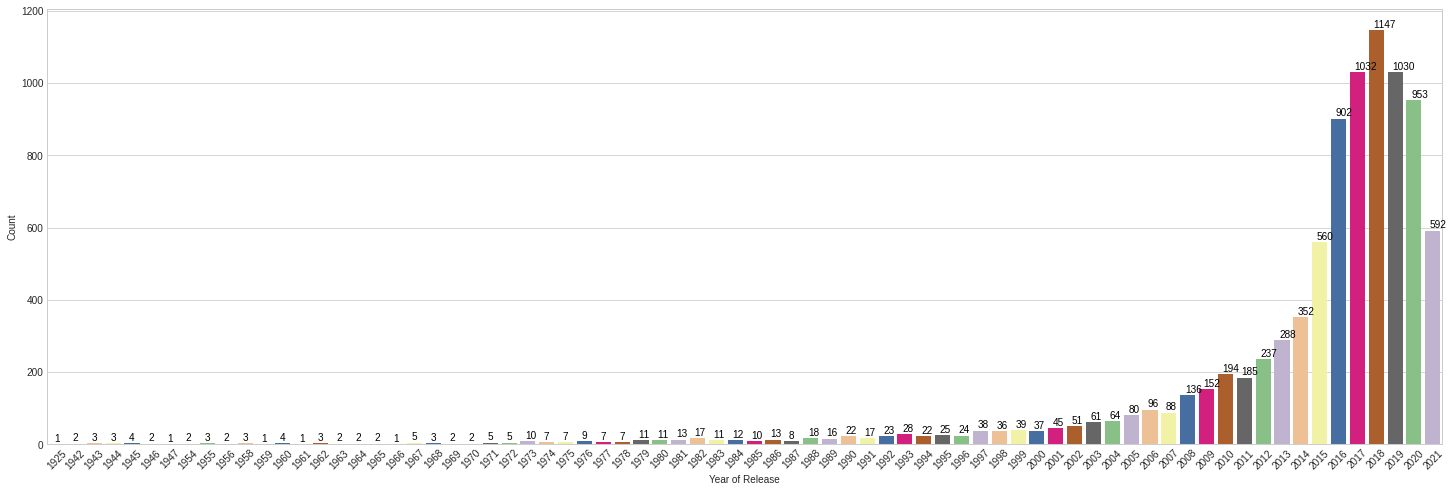

In [21]:
plt.figure(figsize=(25,8))
plt.style.use('seaborn-whitegrid')
ax=sns.countplot(x='release_year',data=df,palette="Accent")
plt.xlabel('Year of Release')
plt.ylabel('Count')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va = 'bottom', color = 'black')

In [22]:
df['date_added']=pd.to_datetime(df['date_added'])

In [23]:
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [24]:
df.sample()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7921,s7922,Movie,Saheb Bibi Golaam,Pratim D. Gupta,"Anjan Dutt, Swastika Mukherjee, Ritwick Chakra...",India,2017-01-01,2016,TV-MA,118 min,"Dramas, International Movies","A charming cabbie, a cop turned assassin and a..."


Plotting Histogram of how many Movies/TV/Shows added in Netflix each year

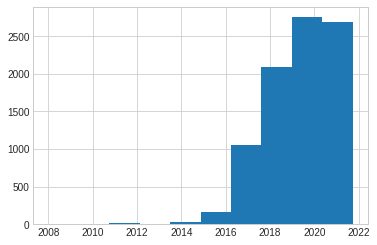

In [25]:
df['date_added'].hist()

In [26]:
# conclusion: last 3-4 years Movies/TV/Shows  increases drastically

How many Tv shows released in the year 2021

In [27]:
df[(df['type']=="TV Show")&(df["release_year"]==2021)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...,...
1460,s1461,TV Show,Monarca,NaN,"Irene Azuela, Juan Manuel Bernal, Osvaldo Bena...",Mexico,2021-01-01,2021,TV-MA,2 Seasons,"International TV Shows, Spanish-Language TV Sh...","After 20 years, Ana María returns to Mexico an..."
1551,s1552,TV Show,Hilda,NaN,"Bella Ramsey, Ameerah Falzon-Ojo, Oliver Nelso...","United Kingdom, Canada, United States",2020-12-14,2021,TV-Y7,2 Seasons,Kids' TV,"Fearless, free-spirited Hilda finds new friend..."
1696,s1697,TV Show,Polly Pocket,NaN,"Emily Tennant, Shannon Chan-Kent, Kazumi Evans...","Canada, United States, Ireland",2020-11-15,2021,TV-Y,2 Seasons,Kids' TV,After uncovering a magical locket that allows ...
2920,s2921,TV Show,Love Is Blind,NaN,"Nick Lachey, Vanessa Lachey",United States,2020-02-13,2021,TV-MA,1 Season,"Reality TV, Romantic TV Shows",Nick and Vanessa Lachey host this social exper...


In [28]:
df[(df['type']=="Movie")&(df["release_year"]==2021)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
13,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,"Klara Castanho, Lucca Picon, Júlia Gomes, Marc...",NaN,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",When the clever but socially-awkward Tetê join...
18,s19,Movie,Intrusion,Adam Salky,"Freida Pinto, Logan Marshall-Green, Robert Joh...",NaN,2021-09-22,2021,TV-14,94 min,Thrillers,After a deadly home invasion at a couple’s new...
...,...,...,...,...,...,...,...,...,...,...,...,...
1425,s1426,Movie,Creating The Queen's Gambit,NaN,NaN,United States,2021-01-08,2021,TV-14,14 min,Documentaries,A fascinating character. Exquisite sets. A wig...
1431,s1432,Movie,Stuck Apart,NaN,"Engin Günaydın, Haluk Bilginer, Binnur Kaya, Ö...",Turkey,2021-01-08,2021,TV-MA,97 min,"Comedies, Dramas, International Movies","Entrenched in a midlife crisis, Aziz seeks sol..."
1436,s1437,Movie,Ratones Paranoicos: The Band that Rocked Argen...,"Alejandro Ruax, Ramiro Martínez","Juan Sebastián Gutiérrez, Pablo Cano, Pablo Me...",NaN,2021-01-06,2021,TV-MA,76 min,"Documentaries, International Movies, Music & M...","The irrepressible Ratones Paranoicos, Argentin..."
1466,s1467,Movie,The Minimalists: Less Is Now,NaN,NaN,United States,2021-01-01,2021,TV-14,54 min,Documentaries,They've built a movement out of minimalism. Lo...


Plotting Histogram of how many Movies/TV shows released each year

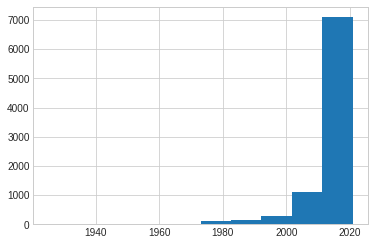

In [29]:
df["release_year"].hist()

In [30]:
# Checking if David Attenborough : A life on Our Planet is present in Netflix of Not?

In [31]:
df[df['title'].isin(["David Attenborough: A Life on Our Planet"])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1886,s1887,Movie,David Attenborough: A Life on Our Planet,"Alastair Fothergill, Jonnie Hughes, Keith Scholey",David Attenborough,"United States, United Kingdom",2020-10-04,2020,PG,84 min,Documentaries,"A broadcaster recounts his life, and the evolu..."


In [32]:
# Plotting Histogram of How many Movies tv shows releases each year-ploty

In [33]:
px.histogram(df,x="release_year",color="release_year")

In [34]:
# Plotting Histogram of how many Movies tv shows released each year-matplotlib

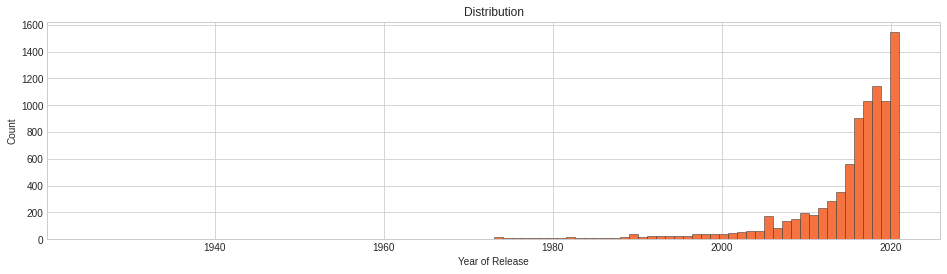

In [35]:
plt.figure(figsize=(16,4))
plt.style.use('seaborn-whitegrid')
plt.hist(df['release_year'],bins=90,facecolor = '#F47340', edgecolor='#323232', linewidth=0.5)
plt.title('Distribution')
plt.xlabel('Year of Release')
plt.ylabel('Count')
plt.show()

In [36]:
df['country'].unique()

array(['United States', 'South Africa', nan, 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kin

    Whart no of movies made only in india

In [37]:
movies_only_in_india=df[(df['type']=='Movie')&(df['country']=='India')]['title']

In [38]:
movies_only_in_india.count()

893

In [39]:
movies_only_in_india.unique()

array(['Jeans', 'Angamaly Diaries', 'Anjaam', 'Dhanak', 'Gurgaon',
       'Shikara', 'Thimmarusu', 'C Kkompany',
       'EMI: Liya Hai To Chukana Padega', 'Koi Aap Sa', 'Krishna Cottage',
       'Kucch To Hai', 'Kyaa Kool Hai Hum', 'Kyaa Kool Hain Hum 3',
       'Kyaa Super Kool Hain Hum', 'Kyo Kii... Main Jhuth Nahin Bolta',
       'LSD: Love, Sex Aur Dhokha',
       'Mission Istaanbul: Darr Ke Aagey Jeet Hai',
       'Once Upon a Time in Mumbaai',
       'Once Upon a Time in Mumbai Dobaara!', 'Ragini MMS',
       'Ragini MMS 2', 'Shootout at Lokhandwala', 'Shor In the City',
       'The Dirty Picture', 'Bombay', 'Chennai Express', 'Department',
       'Chhota Bheem And The Broken Amulet', 'Chhota Bheem aur Krishna',
       'Har Kisse Ke Hisse: Kaamyaab', 'Rehmataan', 'Truckbhar Swapna',
       'Ujala', 'Haseen Dillruba', 'Sarbath', '99 Songs',
       'Sardar Ka Grandson', 'Ahaan', 'Cinema Bandi',
       'Tottaa Pataaka Item Maal', 'Nayattu', 'Milestone',
       'Time to Dance', 'The 

In [40]:
df['date_added'].dt.month

0        9.0
1        9.0
2        9.0
3        9.0
4        9.0
        ... 
8802    11.0
8803     7.0
8804    11.0
8805     1.0
8806     3.0
Name: date_added, Length: 8807, dtype: float64

In [41]:
df["date_added_month"]=df["date_added"].dt.month.fillna(-1)
df['date_added_month'].unique()

array([ 9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1., 12., 11., 10., -1.])

In [42]:
df['date_added_month']=df['date_added_month'].astype('Int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           8807 non-null   object        
 1   type              8807 non-null   object        
 2   title             8807 non-null   object        
 3   director          6173 non-null   object        
 4   cast              7982 non-null   object        
 5   country           7976 non-null   object        
 6   date_added        8797 non-null   datetime64[ns]
 7   release_year      8807 non-null   int64         
 8   rating            8803 non-null   object        
 9   duration          8804 non-null   object        
 10  listed_in         8807 non-null   object        
 11  description       8807 non-null   object        
 12  date_added_month  8807 non-null   Int64         
dtypes: Int64(1), datetime64[ns](1), int64(1), object(10)
memory usage: 903.2+ KB


Checking the Number of Content added Month_Wise

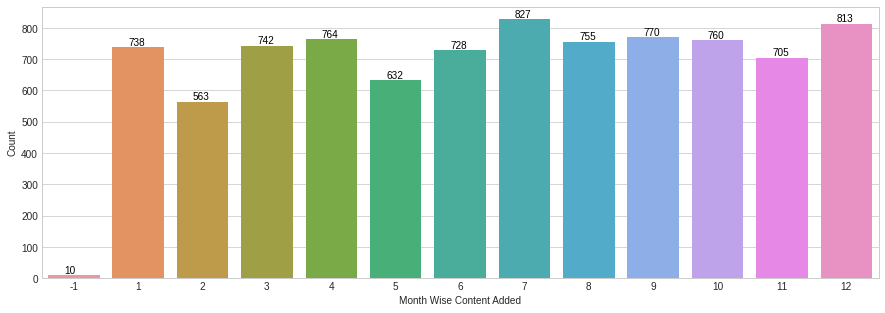

In [43]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x="date_added_month",data=df)
plt.xlabel('Month Wise Content Added')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va = 'bottom', color = 'black')

In [44]:
df['date_added_day']=df['date_added'].dt.day.fillna(-1)
df["date_added_day"].unique()

array([25., 24., 23., 22., 21., 20., 19., 17., 16., 15., 14., 11., 10.,
        9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1., 31., 29., 28., 27.,
       26., 18., 13., 12., 30., -1.])

In [45]:
df['date_added_day']=df['date_added_day'].astype('Int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           8807 non-null   object        
 1   type              8807 non-null   object        
 2   title             8807 non-null   object        
 3   director          6173 non-null   object        
 4   cast              7982 non-null   object        
 5   country           7976 non-null   object        
 6   date_added        8797 non-null   datetime64[ns]
 7   release_year      8807 non-null   int64         
 8   rating            8803 non-null   object        
 9   duration          8804 non-null   object        
 10  listed_in         8807 non-null   object        
 11  description       8807 non-null   object        
 12  date_added_month  8807 non-null   Int64         
 13  date_added_day    8807 non-null   Int64         
dtypes: Int64(2), datetime64[

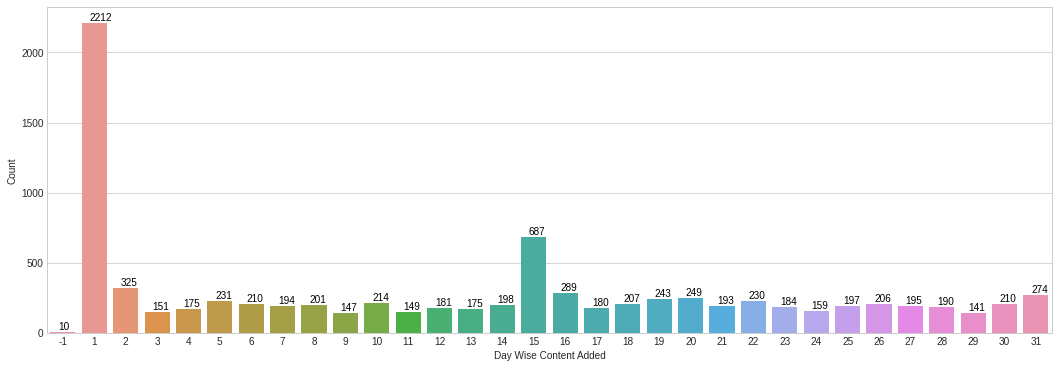

In [46]:
plt.figure(figsize = (18, 6))
ax = sns.countplot(x = 'date_added_day', data = df)
plt.xlabel('Day Wise Content Added')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va = 'bottom', color = 'black')

In [47]:
# Working with Country

In [48]:
country_count=df.copy()

In [49]:
df["type"].nunique()

2

In [50]:
country_count = pd.concat([country_count,df["country"].str.split(",", expand = True)], axis = 1)
country_count

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,2,3,4,5,6,7,8,9,10,11
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,...,None,None,None,None,None,None,None,None,None,None
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,...,None,None,None,None,None,None,None,None,None,None
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,...,None,None,None,None,None,None,None,None,None,None
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,...,None,None,None,None,None,None,None,None,None,None
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,...,None,None,None,None,None,None,None,None,None,None
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,...,None,None,None,None,None,None,None,None,None,None
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,...,None,None,None,None,None,None,None,None,None,None
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,...,None,None,None,None,None,None,None,None,None,None


In [51]:
country_count = country_count.melt(id_vars = ["type", "title"], value_vars = range(12), value_name = "country")
country_count = country_count[country_count["country"].notna()]
country_count

,type,title,variable,country
0,Movie,Dick Johnson Is Dead,0,United States
1,TV Show,Blood & Water,0,South Africa
4,TV Show,Kota Factory,0,India
7,Movie,Sankofa,0,United States
8,TV Show,The Great British Baking Show,0,United Kingdom
...,...,...,...,...
78859,Movie,The Look of Silence,8,Germany
85496,Movie,Barbecue,9,Sweden
87666,Movie,The Look of Silence,9,Netherlands
94303,Movie,Barbecue,10,United States


In [52]:
country_count["country"].nunique()

197

In [53]:
country_count["country"].value_counts()[:10]

United States     3211
India             1008
United Kingdom     628
 United States     479
Canada             271
Japan              259
France             212
South Korea        211
Spain              181
 France            181
Name: country, dtype: int64

Text(0.5, 0, 'Count')

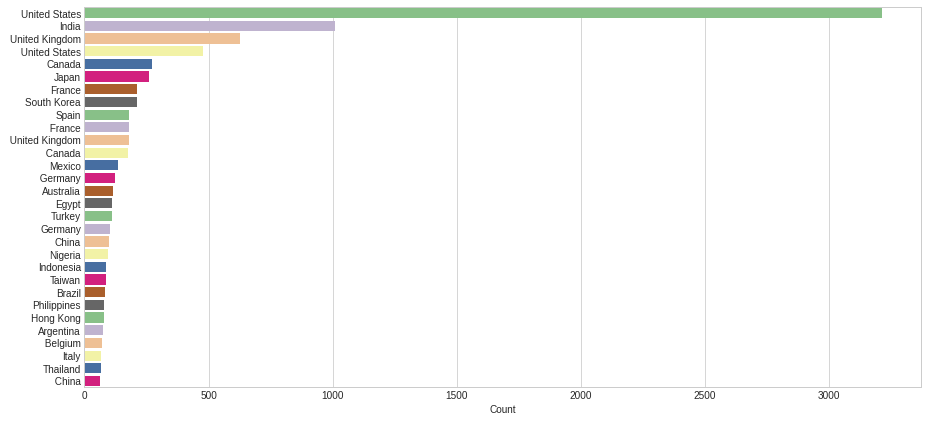

In [54]:
plt.figure(figsize = (15, 7))
country = country_count["country"].value_counts()[:30]
sns.barplot(x = country, y = country.index, palette = "Accent")
plt.xlabel("Count")

In [55]:
country_count["country"] = country_count["country"].str.strip()

In [56]:
country_count["country"].value_counts()[:10]

United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
Name: country, dtype: int64

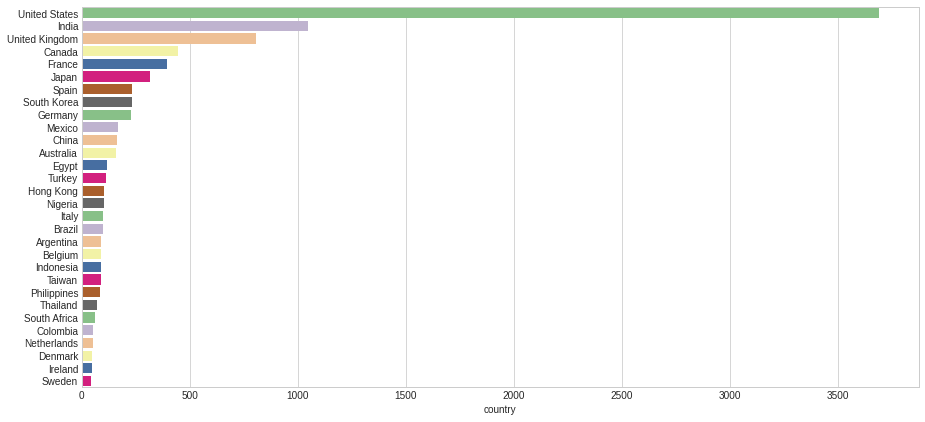

In [57]:
plt.figure(figsize = (15, 7))
country = country_count["country"].value_counts()[:30]
sns.barplot(x = country, y = country.index, palette = "Accent")

In [58]:
px.histogram(country_count, "country", color = "type").update_xaxes(categoryorder = "total descending")

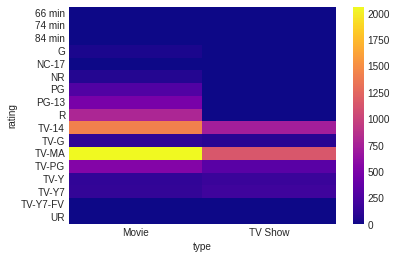

In [60]:
colormap = plt.cm.plasma
sns.heatmap(pd.crosstab(df["rating"],df["type"]), cmap = colormap)

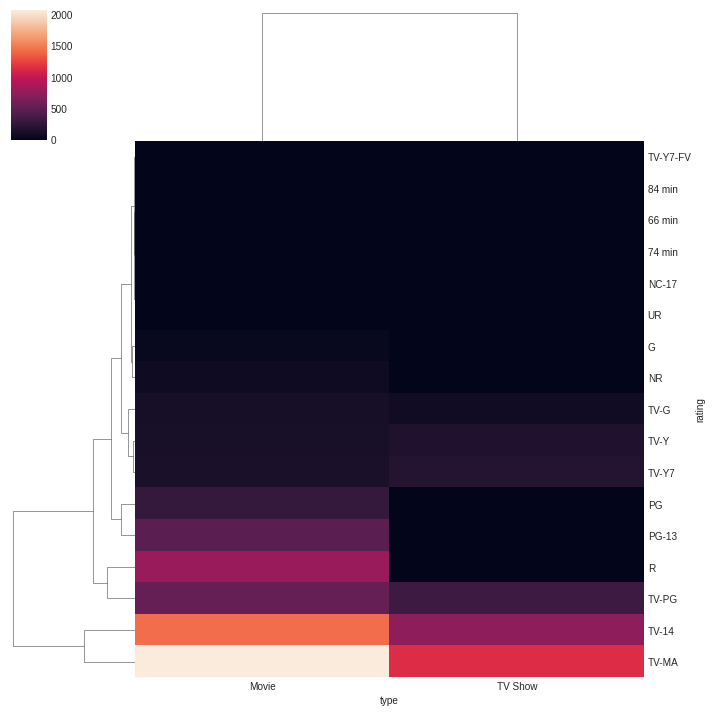

In [62]:
sns.clustermap(pd.crosstab(df["rating"],df["type"]))

In [64]:
cast_count = df.copy()
cast_count = pd.concat([cast_count, df["cast"].str.split(",", expand = True)], axis = 1)
cast_count

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,40,41,42,43,44,45,46,47,48,49
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,...,None,None,None,None,None,None,None,None,None,None
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,...,None,None,None,None,None,None,None,None,None,None
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,...,None,None,None,None,None,None,None,None,None,None
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,...,None,None,None,None,None,None,None,None,None,None


In [65]:
cast_count = cast_count.melt(id_vars = ["type", "title"], value_vars = range(50), value_name = "cast")
cast_count = cast_count[cast_count["cast"].notna()]
cast_count

,type,title,variable,cast
1,TV Show,Blood & Water,0,Ama Qamata
2,TV Show,Ganglands,0,Sami Bouajila
4,TV Show,Kota Factory,0,Mayur More
5,TV Show,Midnight Mass,0,Kate Siegel
6,Movie,My Little Pony: A New Generation,0,Vanessa Hudgens
...,...,...,...,...
417703,TV Show,Black Mirror,47,Jon Hamm
424590,TV Show,Social Distance,48,Ayize Ma'at
426510,TV Show,Black Mirror,48,Oona Chaplin
433397,TV Show,Social Distance,49,Lovie Simone


In [66]:
cast_count["cast"].nunique()

39296

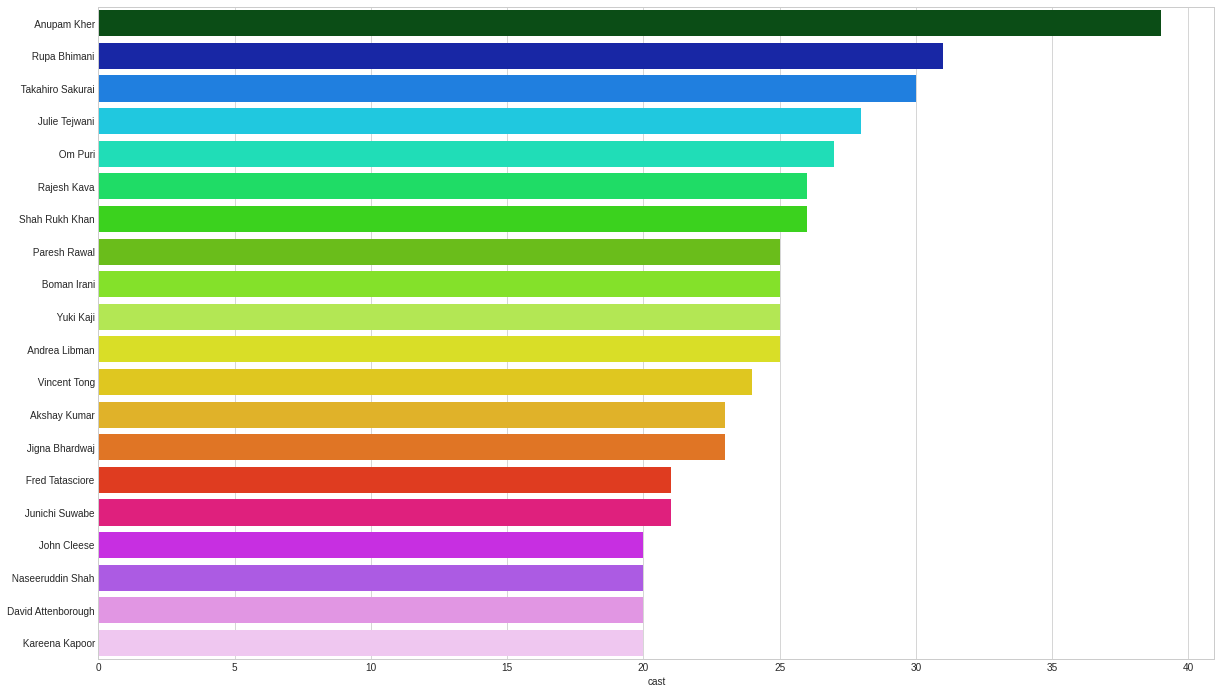

In [67]:
plt.figure(figsize = (20, 12))
cast = cast_count["cast"].value_counts()[:20]
sns.barplot(x = cast, y = cast.index, palette = "gist_ncar")

In [69]:
updated_df = df.dropna()

In [70]:
updated_df[updated_df["cast"].str.contains("Bill Murray")]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_month,date_added_day
494,s495,Movie,Rock the Kasbah,Barry Levinson,"Bill Murray, Kate Hudson, Zooey Deschanel, Dan...",United States,2021-07-08,2015,R,106 min,"Comedies, Music & Musicals",When a has-been music producer gets stuck in A...,7,8
566,s567,Movie,Charlie's Angels,McG,"Cameron Diaz, Drew Barrymore, Lucy Liu, Bill M...","United States, Germany",2021-07-01,2000,PG-13,98 min,"Action & Adventure, Comedies",A tight-knit trio of specially trained agents ...,7,1
5881,s5882,Movie,A Very Murray Christmas,Sofia Coppola,"Bill Murray, Miley Cyrus, George Clooney, Chri...",United States,2015-12-04,2015,TV-14,57 min,"Comedies, Music & Musicals",Bill Murray rounds up an all-star cast for an ...,12,4
6036,s6037,Movie,A Glimpse Inside the Mind of Charles Swan III,Roman Coppola,"Charlie Sheen, Jason Schwartzman, Bill Murray,...",United States,2018-07-15,2012,R,86 min,"Comedies, Independent Movies",When his girlfriend walks out and leaves him a...,7,15
6842,s6843,Movie,Get Smart,Peter Segal,"Steve Carell, Anne Hathaway, Dwayne Johnson, A...",United States,2019-04-01,2008,PG-13,110 min,"Action & Adventure, Comedies",When the identities of secret agents are compr...,4,1
7210,s7211,Movie,Kingpin,"Peter Farrelly, Bobby Farrelly","Woody Harrelson, Randy Quaid, Vanessa Angel, B...",United States,2020-01-01,1996,PG-13,114 min,"Comedies, Cult Movies, Sports Movies","After a bowler loses his hand, his career take...",1,1
8105,s8106,Movie,Stripes,Ivan Reitman,"Bill Murray, Harold Ramis, Warren Oates, P.J. ...",United States,2019-09-01,1981,R,106 min,"Classic Movies, Comedies, Cult Movies","After losing everything, an indolent sad sack ...",9,1
8210,s8211,Movie,The Bill Murray Stories: Life Lessons Learned ...,Tommy Avallone,"Tommy Avallone, Bill Murray, Joel Murray, Pete...",United States,2018-12-31,2018,TV-MA,72 min,Documentaries,This documentary highlights spontaneous encoun...,12,31
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,11,1


In [72]:
listed_in_count = df.copy()
listed_in_count = pd.concat([listed_in_count,df["listed_in"].str.split(",", expand = True)], axis = 1)
listed_in_count

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_month,date_added_day,0,1,2
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,25,Documentaries,None,None
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,24,International TV Shows,TV Dramas,TV Mysteries
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,24,Crime TV Shows,International TV Shows,TV Action & Adventure
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,24,Docuseries,Reality TV,None
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,24,International TV Shows,Romantic TV Shows,TV Comedies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",11,20,Cult Movies,Dramas,Thrillers
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",7,1,Kids' TV,Korean TV Shows,TV Comedies
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,11,1,Comedies,Horror Movies,None
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",1,11,Children & Family Movies,Comedies,None


In [73]:
listed_in_count = listed_in_count.melt(id_vars = ["type", "title"], value_vars = range(3), value_name = "listed_in")
listed_in_count = listed_in_count[listed_in_count["listed_in"].notna()]
listed_in_count

,type,title,variable,listed_in
0,Movie,Dick Johnson Is Dead,0,Documentaries
1,TV Show,Blood & Water,0,International TV Shows
2,TV Show,Ganglands,0,Crime TV Shows
3,TV Show,Jailbirds New Orleans,0,Docuseries
4,TV Show,Kota Factory,0,International TV Shows
...,...,...,...,...
26414,TV Show,Zindagi Gulzar Hai,2,TV Dramas
26415,Movie,Zinzana,2,Thrillers
26416,Movie,Zodiac,2,Thrillers
26417,TV Show,Zombie Dumb,2,TV Comedies


In [74]:
listed_in_count["listed_in"].unique()

array(['Documentaries', 'International TV Shows', 'Crime TV Shows',
       'Docuseries', 'TV Dramas', 'Children & Family Movies', 'Dramas',
       'British TV Shows', 'Comedies', 'TV Comedies', 'Thrillers',
       'Horror Movies', "Kids' TV", 'Action & Adventure', 'Reality TV',
       'Anime Series', 'International Movies', 'Sci-Fi & Fantasy',
       'Classic Movies', 'TV Shows', 'Stand-Up Comedy',
       'TV Action & Adventure', 'Movies', 'Stand-Up Comedy & Talk Shows',
       'Classic & Cult TV', 'Anime Features', 'Romantic TV Shows',
       'Cult Movies', 'Independent Movies', 'TV Horror',
       'Spanish-Language TV Shows', 'Music & Musicals', 'Romantic Movies',
       'LGBTQ Movies', 'TV Sci-Fi & Fantasy', 'Sports Movies',
       ' TV Dramas', ' International TV Shows', ' Reality TV',
       ' Romantic TV Shows', ' TV Horror', ' Independent Movies',
       ' Dramas', ' Docuseries', ' International Movies', ' Comedies',
       ' Crime TV Shows', ' Spanish-Language TV Shows',
      

In [75]:
df["rating"].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

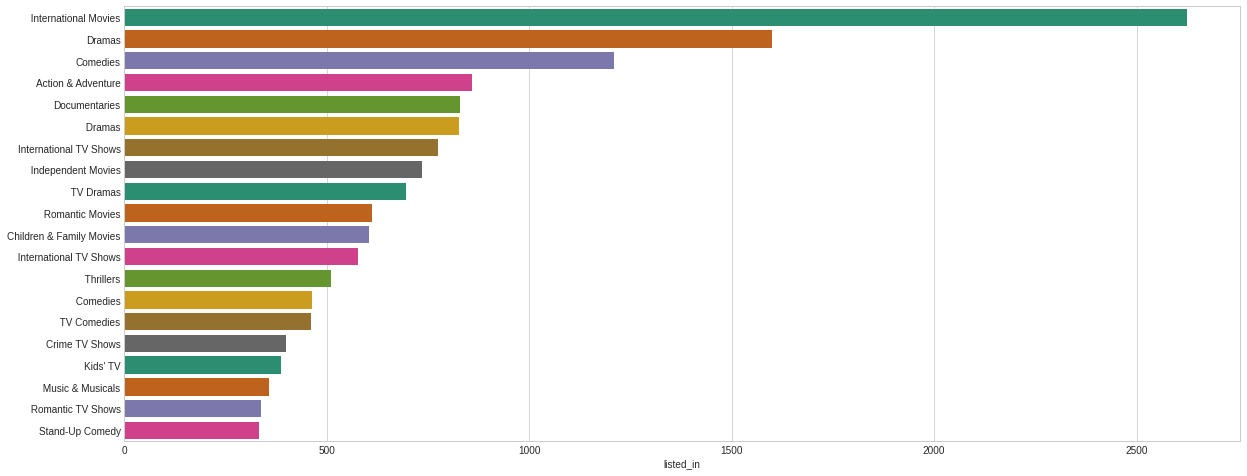

In [76]:
plt.figure(figsize = (20, 8))
listed_in = listed_in_count["listed_in"].value_counts()[:20]
sns.barplot(x = listed_in, y = listed_in.index, palette = "Dark2")

In [78]:
print(df["description"])

0       As her father nears the end of his life, filmm...
1       After crossing paths at a party, a Cape Town t...
2       To protect his family from a powerful drug lor...
3       Feuds, flirtations and toilet talk go down amo...
4       In a city of coaching centers known to train I...
                              ...                        
8802    A political cartoonist, a crime reporter and a...
8803    While living alone in a spooky town, a young g...
8804    Looking to survive in a world taken over by zo...
8805    Dragged from civilian life, a former superhero...
8806    A scrappy but poor boy worms his way into a ty...
Name: description, Length: 8807, dtype: object


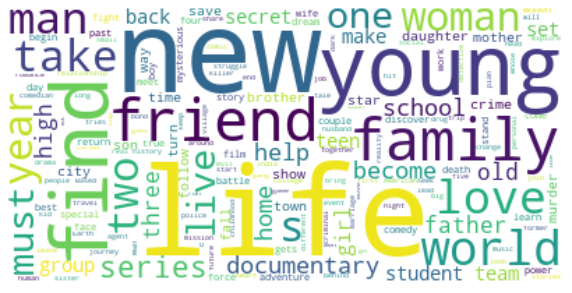

In [80]:
text = " ".join(description for description in df.description)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.figure(figsize = (10, 6))
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [82]:
director_count = df.copy()
director_count = pd.concat([director_count, df["director"].str.split(",", expand = True)], axis = 1)
director_count

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,3,4,5,6,7,8,9,10,11,12
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,...,None,None,None,None,None,None,None,None,None,None
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,...,None,None,None,None,None,None,None,None,None,None
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,...,None,None,None,None,None,None,None,None,None,None
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,...,None,None,None,None,None,None,None,None,None,None
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,...,None,None,None,None,None,None,None,None,None,None
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,...,None,None,None,None,None,None,None,None,None,None
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,...,None,None,None,None,None,None,None,None,None,None
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,...,None,None,None,None,None,None,None,None,None,None


In [83]:
director_count = director_count.melt(id_vars = ["type", "title"], value_vars = range(13), value_name = "director")
director_count = director_count[director_count["director"].notna()]
director_count

,type,title,variable,director
0,Movie,Dick Johnson Is Dead,0,Kirsten Johnson
2,TV Show,Ganglands,0,Julien Leclercq
5,TV Show,Midnight Mass,0,Mike Flanagan
6,Movie,My Little Pony: A New Generation,0,Robert Cullen
7,Movie,Sankofa,0,Haile Gerima
...,...,...,...,...
95585,Movie,Movie 43,10,Rusty Cundieff
102764,Movie,Walt Disney Animation Studios Short Films Coll...,11,Mike Gabriel
103787,Movie,HALO Legends,11,Hiroshi Yamazaki
104392,Movie,Movie 43,11,James Gunn


In [84]:
director_count["director"].nunique()

5120

In [85]:
director_count["director"].value_counts()

Rajiv Chilaka         22
 Jan Suter            18
Raúl Campos           18
Suhas Kadav           16
Marcus Raboy          16
                      ..
Peter Howitt           1
Chiwetel Ejiofor       1
Rodrigo Salomón        1
Miguel Ángel Vivas     1
 Mark Henn             1
Name: director, Length: 5120, dtype: int64

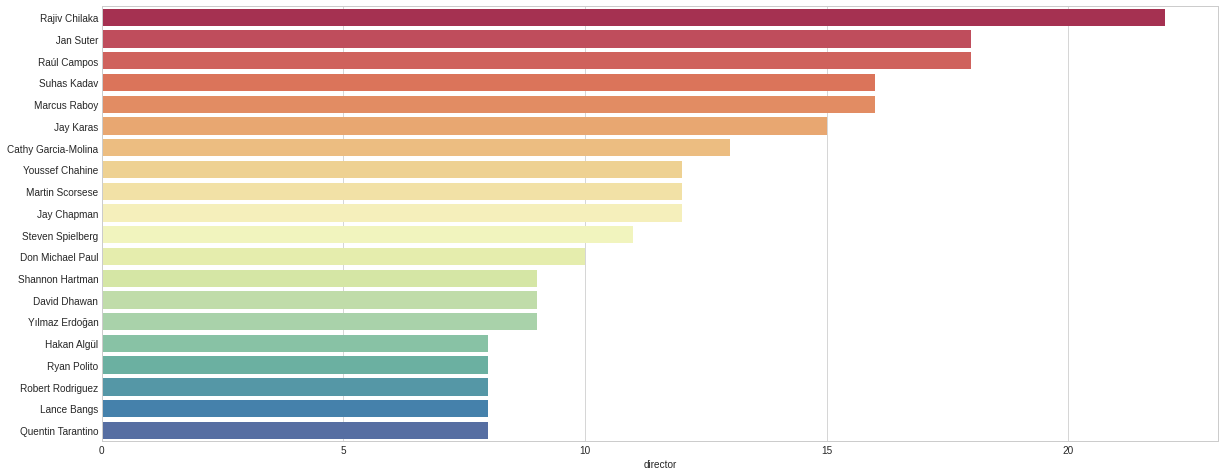

In [86]:
plt.figure(figsize = (20, 8))
director_count = director_count["director"].value_counts()[:20]
sns.barplot(x = director_count, y = director_count.index, palette = "Spectral")

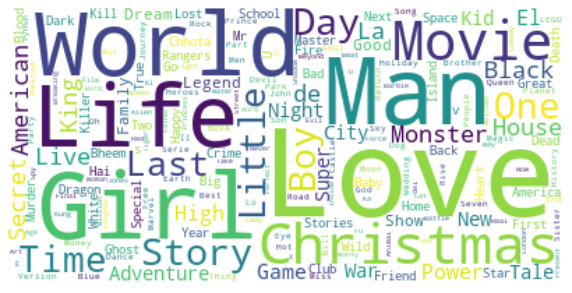

In [88]:
text = " ".join(title for title in df.title)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.figure(figsize = (10, 6))
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()